In [225]:
import numpy as np
import math
from PIL import Image

In [226]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)

In [227]:
def dotted_line(image, x0, y0, x1, y1, count, color):
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

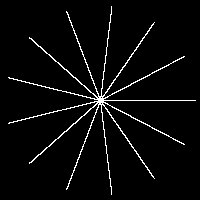

In [228]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * math.pi * pol) / 13
    dotted_line(ar, 100, 100, 100 + 95 * math.cos(alpha), 100 + 95 * math.sin(alpha), 1000, (255))

img = Image.fromarray(ar, mode="L")
img.save("a_1.jpg")
img

In [229]:
def dotted_line(image, x0, y0, x1, y1, color):
    count = math.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

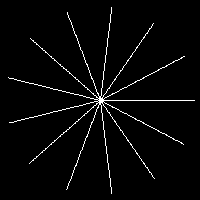

In [230]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line(ar, 100, 100, 100 + 95 * cos(alpha), 100 + 95 * sin(alpha), (255))

img = Image.fromarray(ar, mode="L")
img.save("a_2.jpg")
img

In [231]:
def dotted_line2(image, x0, y0, x1, y1, color):
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

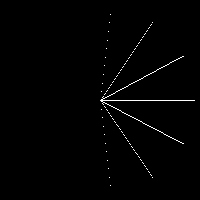

In [232]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line2(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save("a_3.jpg")
img

In [233]:
def dotted_line2(image, x0, y0, x1, y1, color):
    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

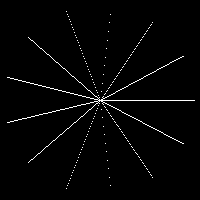

In [234]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line2(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save("a_4.jpg")
img

In [235]:
def dotted_line2(image, x0, y0, x1, y1, color):
    xchange = False
    if abs(x0 - x1) < abs(y0 - y1):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        if xchange:
            image[x, y] = color
        else:
            image[y, x] = color

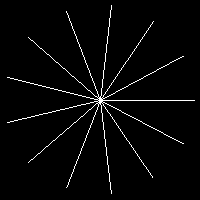

In [236]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line2(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save("a_5.jpg")
img

In [237]:
def dotted_line2(image, x0, y0, x1, y1, color):
    xchange = False
    if abs(x0 - x1) < abs(y0 - y1):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    y = y0
    dy = 2.0 * abs(y1 - y0)
    derror = 0.0
    y_update = 1 if y1 > y0 else -1

    for x in range(x0, x1):
        if xchange:
            image[x, y] = color
        else:
            image[y, x] = color

        derror += dy
        if derror > (x1 - x0):
            derror -= 2 * (x1 - x0)
            y += y_update

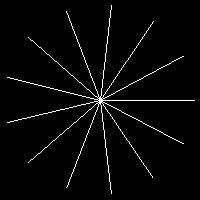

In [238]:
ar = np.full((200, 200), fill_value=0, dtype=np.uint8)
for pol in range(13):
    alpha = (2 * pi * pol) / 13
    dotted_line2(ar, 100, 100, int(100 + 95 * cos(alpha)), int(100 + 95 * sin(alpha)), (255))

img = Image.fromarray(ar, mode="L")
img.save("a_7.jpg")
img

In [276]:
class ObjModel:
    def __init__(self):
        self.vertex = []
        self.polygon = []

    def readModel(self, file: str):
        with open(file, 'r') as obj:
            data = obj.read()

        lines = data.splitlines()

        for line in lines:
            elem = line.split()
            if elem:
                if elem[0] == 'v':
                    self.vertex.append((float(elem[1]), float(elem[2]), float(elem[3])))
                elif elem[0] == 'f':
                    points = [elem[i].split('/') for i in range(1, 4)]
                    self.polygon.append((int(points[0][0]), int(points[1][0]), int(points[2][0])))

    def getVertexFromPolygon(self, pol):
        return [self.vertex[pol[0] - 1], self.vertex[pol[1] - 1], self.vertex[pol[2] - 1]]


obj = ObjModel()
obj.readModel('model_2.obj')
print(obj.polygon)

[(530, 61, 537), (45, 85, 84), (492, 742, 366), (530, 528, 529), (513, 540, 378), (751, 177, 739), (751, 739, 673), (503, 509, 425), (5, 430, 319), (442, 476, 757), (660, 662, 663), (198, 557, 733), (39, 38, 41), (380, 376, 379), (723, 714, 722), (220, 179, 755), (173, 358, 165), (555, 600, 327), (89, 88, 85), (749, 542, 761), (138, 564, 139), (108, 519, 106), (55, 56, 53), (663, 666, 660), (218, 419, 336), (527, 529, 528), (53, 60, 55), (689, 195, 449), (192, 745, 327), (757, 482, 542), (498, 321, 313), (73, 656, 694), (298, 696, 248), (409, 421, 447), (513, 512, 514), (67, 79, 69), (249, 616, 244), (173, 219, 197), (87, 88, 114), (277, 464, 431), (105, 103, 104), (67, 68, 79), (105, 104, 107), (667, 657, 81), (749, 453, 734), (315, 449, 196), (5, 319, 471), (269, 649, 724), (429, 206, 290), (734, 453, 736), (647, 630, 628), (117, 116, 654), (363, 433, 735), (704, 143, 177), (17, 23, 102), (598, 738, 325), (562, 572, 573), (647, 466, 643), (663, 665, 666), (49, 48, 41), (8, 6, 67), (9

In [269]:
from PIL import ImageOps

ar = np.full((1000, 1000), fill_value=0, dtype=np.uint8)
k = 3500
x0 = 500
y0 = 500
for pol in obj.vertex:
    ar[(int(pol[1] * k) + y0)][int(pol[0] * k) + x0] = 255

img = ImageOps.flip(Image.fromarray(ar, mode="L"))
img.save("a_8.jpg")
img

IndexError: index 1466 is out of bounds for axis 0 with size 1000

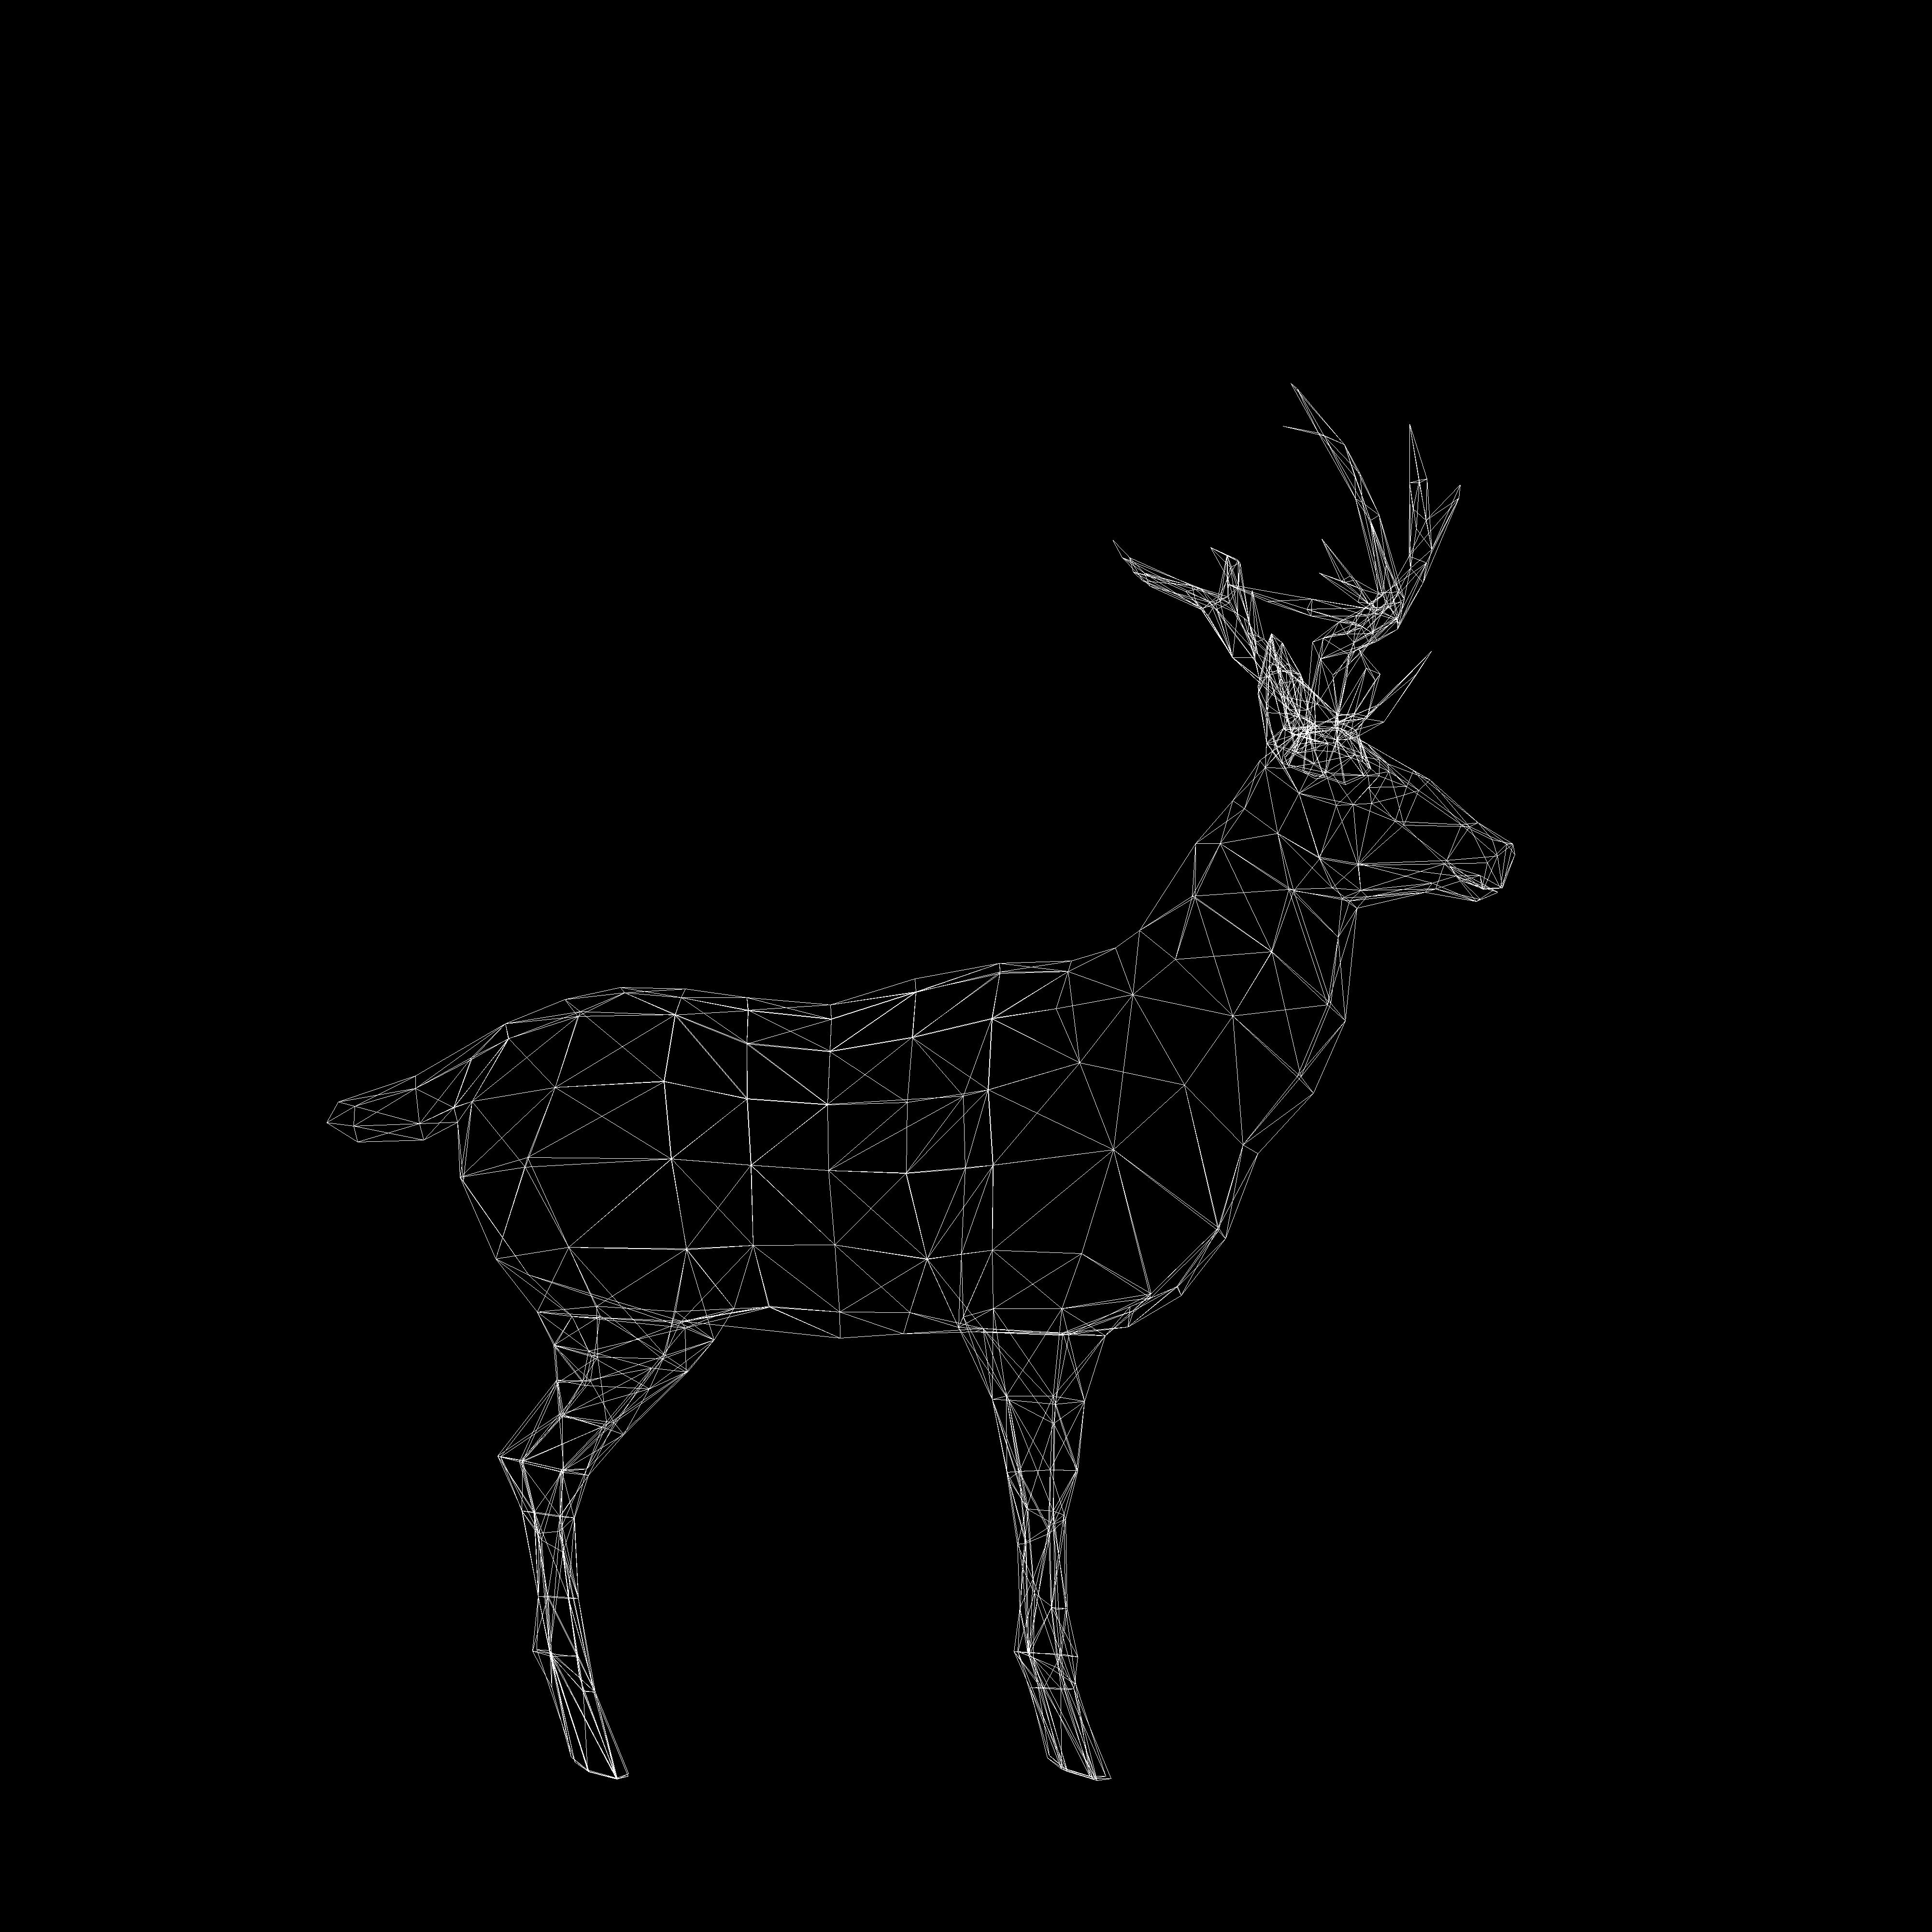

In [291]:
ar = np.full((4000, 4000), fill_value=0, dtype=np.uint8)

k = 2
x0 = 2000
y0 = 300

for pol in obj.polygon:
    for i in range(3):
        vertexs = obj.getVertexFromPolygon(pol)
        dotted_line2(ar, int(vertexs[i % 3][0] * k) + x0, int(vertexs[i % 3][1] * k) + y0,
                     int(vertexs[(i + 1) % 3][0] * k) + x0, int(vertexs[(i + 1) % 3][1] * k) + y0, 255)

img = ImageOps.flip(Image.fromarray(ar, mode="L"))
img.save("a_9.jpg")
img

In [242]:
len(obj.vertex)

15258